In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.tri as tri
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

In [37]:
pklfile = '../learn/pkl_trainsets/19aug2019_opusupdate/nuc-conc_not-scaled_15nuc.pkl'
XY = pd.read_pickle(pklfile)
XY.reset_index(inplace=True, drop=True)
if 'total' in XY.columns:
    XY.drop('total', axis=1, inplace=True)
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
XY.head()

,Burnup,CoolingTime,Enrichment,OrigenReactor,ReactorType,ba136,ba138,cs133,cs134,cs135,cs137,eu153,eu154,pu239,pu240,pu241,pu242,sm149,sm150,sm152
0,0.00,0.000000,0.5,ce14x14,pwr,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.00000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000
1,2165.43,0.000652,0.5,ce14x14,pwr,0.000673,0.6591,0.5623,0.002844,0.1280,0.6070,0.01693,0.000526,2.767,0.1383,0.008548,0.000164,0.008145,0.09504,0.04642
2,2165.43,0.621994,0.5,ce14x14,pwr,0.000681,0.6596,0.5687,0.002843,0.1303,0.6070,0.01712,0.000526,2.798,0.1383,0.008548,0.000164,0.009156,0.09504,0.04643
3,2165.43,1.016193,0.5,ce14x14,pwr,0.000686,0.6596,0.5727,0.002842,0.1315,0.6070,0.01721,0.000526,2.815,0.1383,0.008547,0.000164,0.009706,0.09504,0.04643
4,2165.43,6.259976,0.5,ce14x14,pwr,0.000746,0.6596,0.6132,0.002829,0.1331,0.6068,0.01776,0.000526,2.923,0.1383,0.008541,0.000164,0.013080,0.09504,0.04643


### Replace nuclide concentrations with ratios

- cs137/cs133
- cs134/cs137
- cs135/cs137
- ba136/ba138
- sm150/sm149
- sm152/sm149
- eu154/eu153
- pu240/pu239
- pu241/pu239
- pu242/pu239

In [181]:
ratios = XY.loc[:, lbls].copy()

In [182]:
#cs137/cs133
ratios['cs137/cs133'] = XY['cs137'] / XY['cs133']
#cs134/cs137
ratios['cs134/cs137'] = XY['cs134'] / XY['cs137']
#cs135/cs137
ratios['cs135/cs137'] = XY['cs135'] / XY['cs137']
#ba136/ba138
ratios['ba136/ba138'] = XY['ba136'] / XY['ba138']
#sm150/sm149
ratios['sm150/sm149'] = XY['sm150'] / XY['sm149']
#sm152/sm149
ratios['sm152/sm149'] = XY['sm152'] / XY['sm149']
#eu154/eu153
ratios['eu154/eu153'] = XY['eu154'] / XY['eu153']
#pu240/pu239
ratios['pu240/pu239'] = XY['pu240'] / XY['pu239']
#pu241/pu239
ratios['pu241/pu239'] = XY['pu241'] / XY['pu239']
#pu242/pu239
ratios['pu242/pu239'] = XY['pu242'] / XY['pu239']

ratios.replace([np.inf, -np.inf], 0, inplace=True)
ratios.fillna(0, inplace = True)
ratios

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239
0,pwr,0.000000,0.500,0.00,ce14x14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,pwr,0.000652,0.500,2165.43,ce14x14,1.079495,0.004685,0.210873,0.001021,11.668508,5.699202,0.031081,0.049982,0.003089,0.000059
2,pwr,0.621994,0.500,2165.43,ce14x14,1.067347,0.004684,0.214662,0.001033,10.380079,5.070992,0.030730,0.049428,0.003055,0.000059
3,pwr,1.016193,0.500,2165.43,ce14x14,1.059892,0.004682,0.216639,0.001041,9.791881,4.783639,0.030569,0.049130,0.003036,0.000058
4,pwr,6.259976,0.500,2165.43,ce14x14,0.989563,0.004662,0.219347,0.001131,7.266055,3.549694,0.029589,0.047314,0.002922,0.000056
5,pwr,33.204962,0.500,2165.43,ce14x14,0.925864,0.004557,0.219746,0.001346,6.842333,3.342693,0.029250,0.046834,0.002882,0.000055
6,pwr,368.004536,0.500,2165.43,ce14x14,0.904944,0.003421,0.224414,0.001414,6.842333,3.342693,0.027167,0.046834,0.002757,0.000055
7,pwr,2333.086414,0.500,2165.43,ce14x14,0.799359,0.000636,0.254056,0.001414,6.842333,3.342693,0.017609,0.046816,0.002124,0.000055
8,pwr,3842.037673,0.500,2165.43,ce14x14,0.726732,0.000175,0.279446,0.001414,6.842333,3.342693,0.012620,0.046782,0.001738,0.000055
9,pwr,0.000000,0.500,2165.43,ce14x14,1.079495,0.004685,0.210873,0.001021,11.671374,5.700602,0.031081,0.049982,0.003089,0.000059


In [183]:
### filter trainXY ###
trainXY = ratios.loc[ratios['Burnup'] > 0].copy() #Need to explicitly tell pandas not to worry that I'm making a copy
#trainXY = trainXY.loc[ratios['Burnup'] < 10000].copy() 
trainXY = trainXY.sample(frac=0.3)

In [184]:
def splitXY(dfXY):
    lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
    dfX = dfXY.drop(lbls, axis=1)
    r_dfY = dfXY.loc[:, lbls[0]]
    c_dfY = dfXY.loc[:, lbls[1]]
    e_dfY = dfXY.loc[:, lbls[2]]
    b_dfY = dfXY.loc[:, lbls[3]]
    o_dfY = dfXY.loc[:, lbls[4]]
    return dfX, r_dfY, c_dfY, e_dfY, b_dfY, o_dfY

X, rY, cY, eY, bY, oY = splitXY(trainXY)

In [185]:
trainXY.sample(10)

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239
24281,phwr,0.000548,0.711,13254.50,candu19,0.944186,0.021894,0.270991,0.003729,110.125537,65.130492,0.107763,0.252535,0.055177,0.008203
6005,pwr,22.270270,2.960,9567.41,s14x14,0.948084,0.033629,0.254079,0.004609,27.206585,13.653744,0.106459,0.176824,0.084878,0.008138
21907,bwr,319.819836,1.560,37023.08,svea100-0,1.020924,0.075696,0.277508,0.014085,145.231608,57.227520,0.156640,0.382766,0.322737,0.276322
21180,bwr,0.592878,4.130,41221.51,svea64-1,1.078218,0.114509,0.324977,0.017371,197.592295,65.642055,0.197718,0.299473,0.372173,0.268190
18926,bwr,2272.263634,1.490,19913.26,atrium10x10-9,0.843274,0.008347,0.336449,0.007993,71.355824,33.698281,0.086251,0.298214,0.155571,0.060836
23141,pwr,0.000673,2.400,4096.38,vver440,1.000879,0.015013,0.268481,0.002290,18.500931,9.236499,0.063940,0.092664,0.019990,0.000740
24502,phwr,415.309596,0.711,10801.60,candu28,0.906007,0.012951,0.290587,0.003473,52.297297,30.521236,0.084783,0.214362,0.042578,0.005232
7550,pwr,0.740285,4.760,44567.14,s18x18,1.113296,0.135240,0.332717,0.019315,137.890625,39.477539,0.239037,0.244867,0.409779,0.233761
11343,bwr,390.140656,0.530,16192.01,ge8x8-1,0.927246,0.027474,0.263691,0.005490,70.901639,38.024590,0.104957,0.351249,0.132567,0.032138
17007,bwr,7.070296,5.340,31615.26,abb8x8-1,1.032743,0.096226,0.350408,0.014351,99.270453,36.237624,0.188506,0.264432,0.328235,0.152122


# ML Calculation
## Likelihoods of each observation calculated for a single comparison

In [186]:
### If random filtering: make sure sample isn't in training set ###
sim_idx = 24503
test_exist = trainXY.loc[trainXY.index == sim_idx]
test_exist

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239


In [187]:
test_sample = ratios.loc[ratios.index == sim_idx].drop(lbls, axis=1)
test_answer = ratios.loc[ratios.index == sim_idx, lbls]
test_answer
test_sample

,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239
24503,0.799253,0.002354,0.3294,0.003473,52.297297,30.521236,0.054657,0.214257,0.032695,0.005232


In [188]:
def ll_calc(y_sim, y_mes, std):
    ll = np.sum(stats.norm.logpdf(y_sim, loc=y_mes, scale=std))
    return ll

def unc_calc(y_sim, y_mes, sim_unc_sq, mes_unc_sq):
    unc = ((y_sim - y_mes) / sim_unc_sq)**2 * (sim_unc_sq + mes_unc_sq)
    unc.replace([np.inf, -np.inf], 0, inplace=True)
    unc.fillna(0, inplace = True)
    return np.sqrt(unc.sum(axis=1))

In [189]:
row_unc = 0.14
test_unc = 0.14
trainXY['LogLikelihood'] = X.apply(lambda row: ll_calc(row, test_sample.iloc[0], row_unc*row), axis=1)
#############################################################################
# pandas converts each row to a series, so using .iloc[0] on the single-row #
# dataframe that is test_sample allows the function to work properly        #
#############################################################################

In [190]:
trainXY['LLUncertainty'] = X.apply(lambda row: unc_calc(row, test_sample, (row_unc*row)**2, (test_unc*test_sample)**2), axis=1)

In [191]:
trainXY.sample(10)

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239,LogLikelihood,LLUncertainty
9014,pwr,0.000562,1.41,48553.15,vver1000,1.123157,0.130965,0.218378,0.015997,344.919462,119.341165,0.182840,0.409510,0.379650,0.431538,-134.160873,18.276690
17289,bwr,462.524473,0.50,44589.99,atrium9x9-9,1.052583,0.074882,0.254952,0.016479,187.676609,78.076923,0.142857,0.507596,0.310813,0.476765,-116.409445,16.774677
11231,bwr,0.551014,4.67,65541.91,ge7x7-0,1.221816,0.146914,0.358598,0.029750,286.384615,74.938462,0.217350,0.282601,0.378153,0.427309,-124.423017,16.822414
1543,pwr,38.626540,2.04,29087.28,ce16x16,1.013484,0.086695,0.239736,0.010696,87.045341,34.399601,0.168664,0.331479,0.330152,0.152908,-87.487106,15.324694
10346,bwr,1.187031,1.95,13042.30,ge7x7-0,0.965082,0.038158,0.286947,0.005279,63.909502,32.733032,0.114653,0.253525,0.124630,0.020392,-41.157637,11.873849
15284,bwr,2158.208665,4.38,24779.72,ge10x10-8,0.877689,0.013130,0.422523,0.012522,70.080607,27.681366,0.110395,0.236481,0.209592,0.091849,-61.241972,13.227215
23054,pwr,31.756523,1.60,31905.11,vver440,1.022671,0.091446,0.246402,0.011621,102.216216,40.313514,0.172841,0.345171,0.334393,0.179564,-92.858071,15.568986
13331,bwr,377.178187,2.18,22385.74,ge9x9-2,0.957166,0.046433,0.293069,0.008814,82.718447,38.116505,0.132147,0.333766,0.234993,0.087446,-72.908267,14.086794
17378,bwr,5.948897,1.59,5494.71,atrium9x9-9,0.951462,0.015075,0.289405,0.002574,21.189736,11.345257,0.067569,0.122713,0.025327,0.001410,-323.686707,87.826204
8799,pwr,0.851833,0.54,36206.25,vver1000,1.048175,0.099009,0.189153,0.011061,229.251179,96.941125,0.159493,0.499437,0.341158,0.287299,-129.986669,19.662337


### Max LL: Reactor-dependent (paper presents it this way)

#### PWR

In [192]:
max_pwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'pwr'].max()
idx_pwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'pwr'].idxmax()
unc_pwr = float(trainXY['LLUncertainty'].loc[trainXY.index == idx_pwr])
print(f'Max Log Likelihood for PWRs: {max_pwr} +/- {unc_pwr}')
trainXY.loc[trainXY.index == idx_pwr, ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']]

Max Log Likelihood for PWRs: 3.3187605442792094 +/- 8.731787340730461


,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor
5473,pwr,2899.111242,0.51,12949.63,s14x14


#### BWR

In [193]:
max_bwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'bwr'].max()
idx_bwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'bwr'].idxmax()
unc_bwr = float(trainXY['LLUncertainty'].loc[trainXY.index == idx_bwr])
print(f'Max Log Likelihood for BWRs: {max_bwr} +/- {unc_bwr}')
trainXY.loc[trainXY.index == idx_bwr, ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']]

Max Log Likelihood for BWRs: 16.215672227793615 +/- 8.774897534345143


,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor
20083,bwr,2171.066572,0.5,9224.93,svea64-1


#### PHWR

In [194]:
max_phwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'phwr'].max()
idx_phwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'phwr'].idxmax()
unc_phwr = float(trainXY['LLUncertainty'].loc[trainXY.index == idx_phwr])
print(f'Max Log Likelihood for PHWRs: {max_phwr} +/- {unc_phwr}')
trainXY.loc[trainXY.index == idx_phwr, ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']]

Max Log Likelihood for PHWRs: 29.318805508054876 +/- 0.5687359225632385


,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor
24494,phwr,2406.828453,0.711,10675.51,candu28


## LL wrt Burnup and Cool Time

In [195]:
min_ll = trainXY['LogLikelihood'].min()
max_ll = trainXY['LogLikelihood'].max()
min_ll, max_ll

(-33764454975.858997, 29.318805508054876)

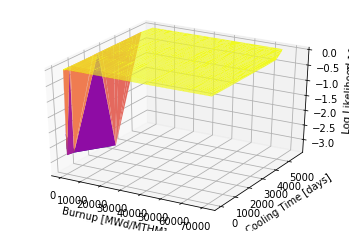

In [196]:
x = trainXY['Burnup']
y = trainXY['CoolingTime']
triang = tri.Triangulation(x, y)
z = trainXY['LogLikelihood']

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(triang, z, linewidth=0.1, cmap=plt.cm.plasma)
ax.set_xlabel('Burnup [MWd/MTHM]')
ax.set_ylabel('Cooling Time [days]')
ax.set_zlabel('Log Likelihood')
plt.show()

# ML Estimation
## Coefficients of linear models estimated
This example is done with dependent variable = burnup

In [53]:
class NormMod(GenericLikelihoodModel):
    def __init__(self, endog, exog, **kwds):
        super(NormMod, self).__init__(endog, exog, **kwds)
    
    def nloglikeobs(self, params):
        beta = params
        yhat = np.dot(self.exog, beta)
        LL = stats.norm.logpdf(self.endog, loc=yhat)
        return -LL
    
    def fit(self, start_params=None, maxiter=100000, maxfun=100000, **kwds):
        if start_params == None:
            start_params = np.zeros(self.exog.shape[1])
            start_params[0] = np.log(self.endog.mean())
        return super(NormMod, self).fit(start_params=start_params,
                                        maxiter=maxiter, maxfun=maxfun,
                                        **kwds)

In [54]:
y = bY
X = sm.add_constant(X)

/home/opotowsky/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
X.shape

(6176, 11)

In [56]:
mod = NormMod(y, X)

In [57]:
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 32884746.057645
         Iterations: 1678
         Function evaluations: 2469
                               NormMod Results                                
Dep. Variable:                 Burnup   Log-Likelihood:            -2.0310e+11
Model:                        NormMod   AIC:                         4.062e+11
Method:            Maximum Likelihood   BIC:                         4.062e+11
Date:                Wed, 21 Aug 2019                                         
Time:                        11:14:20                                         
No. Observations:                6176                                         
Df Residuals:                    6165                                         
Df Model:                          10                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------